# K-Means first principles

To fully understand the K-means clustering algorithm, and for the sake of practice, I try designing my own clustering algorithm :)

# How does K-means clustering work?

1) Initialise random cluster centres (# of clusters specified previously!)

2) for each datapoint:
    - calculate the distance to the cluster centre (find modulus of distance)
    - find the cluster centre that is closest to the datapoint
    - assign the datapoint to that cluster 
    
3) update cluster centres (different parameters can be used for this, one way is to just use the mean of the datapoints set to the cluster)

4) repeat steps 2) 3) until algorithm converges

# What are the limitations?

1) Number of clusters has to be pre-specifcied
2) All clustered will have the same shape
3) the 'convergence' will yield to you the 'local' optimum cluster centres, not necessarily the global ones. As such the choice of the initial cluster centres affects the accuracy obtained


# Useful libraries

In [176]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler as MinMax
from sklearn.utils import shuffle 

# Data exploration

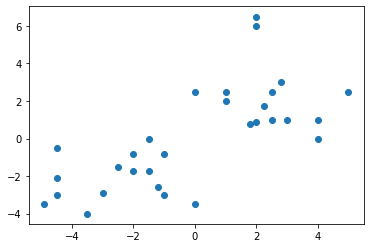

     X    Y
0 -4.9 -3.5
1 -3.5 -4.0
2  0.0 -3.5
3 -4.5 -3.0
4 -3.0 -2.9


,X,Y
0,0.000000,0.047619
1,0.141414,0.000000
2,0.494949,0.047619
3,0.040404,0.095238
4,0.191919,0.104762


In [177]:
x1 = [-4.9, -3.5, 0, -4.5, -3, -1, -1.2, -4.5, -1.5, -4.5, -1, -2, -2.5, -2, -1.5, 4, 1.8, 2, 2.5, 3, 4, 2.25, 1, 0, 1, 2.5, 5, 2.8, 2, 2]
x2 = [-3.5, -4, -3.5, -3, -2.9, -3, -2.6, -2.1, 0, -0.5, -0.8, -0.8, -1.5, -1.75, -1.75, 0, 0.8, 0.9, 1, 1, 1, 1.75, 2, 2.5, 2.5, 2.5, 2.5, 3, 6, 6.5]
#df = pd.DataFrame(columns=['X1','X2'], data = [np.transpose(x1),np.transpose(x2)])
data = {'X':x1, 'Y':x2}
df = pd.DataFrame(data=data)
plt.scatter(x1,x2)
plt.show()
print(df.head())

#data purosely converted to df for learning purposes
MinMaxObj = MinMax()
d_array = MinMaxObj.fit_transform(df.values);
df_normalized = pd.DataFrame(d_array,columns = ['X','Y'])
df_normalized.head()

# Making my own Clustering algorithm for the first time

[[0.48215488215488217, 0.3606349206349206], [0.495959595959596, 0.41555555555555557]]


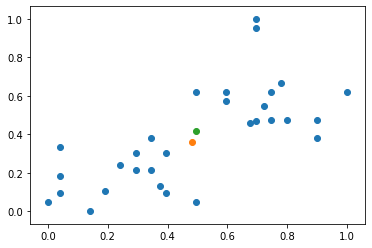

In [178]:
def findInitClusters(d_array, num_centres):
    """ finds initial clusters randomly based on mean """
    clusters = []
    d_array = shuffle(d_array)
    partitions = d_array.shape[0]//num_centres
    for i in range(num_centres):
        clusters.append(d_array[i*partitions:(i+1)*partitions].mean(0).tolist())
    return clusters

clusters = findInitClusters(d_array, 2)
print(clusters)

plt.scatter(df_normalized['X'],df_normalized['Y'])
for row in clusters:
    plt.scatter(row[0],row[1])
plt.show()

from above, it seems that we have at least two clusters for this particular dataset. The number of points is low tho, as such our intuition might be incorrect. I'm not sure if using K-means is the best approach here...
However, for the purpose of the lab, we'll try it!

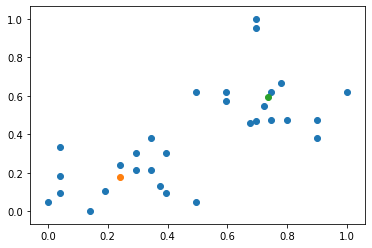

In [179]:
#array = np.array([[1,2],[3,4],[5,6]])

def findNearestCluster(d_array, cluster_centres):
    """ finds the nearest cluster, note: cluster_centres is a list containing a lists of the coordinates """
    nearestCluster = [[] for i in range(len(cluster_centres))]
    for row in d_array:
        small_dist = 1;
        index=0;
        for cluster_index, cluster in enumerate(cluster_centres):
            dist = ((np.array(row)-np.array(cluster))**2).sum()
            if (dist<small_dist):
                small_dist = dist;
                index = cluster_index;
        nearestCluster[index].append(row.tolist());
    average_loc = np.zeros(len(cluster_centres))
    return nearestCluster

nearestCluster = findNearestCluster(d_array, clusters)

def findCentres(d_clusters):
    centres = [];
    for cluster in d_clusters:
        centres.append(np.array(cluster).mean(0))
    return centres

centres = findCentres(nearestCluster)

plt.scatter(df_normalized['X'],df_normalized['Y'])
for row in centres:
    plt.scatter(row[0],row[1])
plt.show()

There has been *some* improvement, but very minimal... 
Perhaps my method of initialising functions had been wrong?

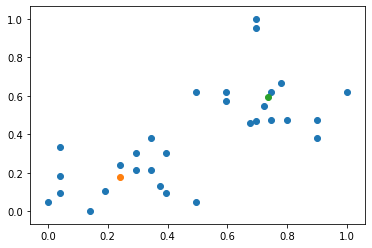

In [180]:
# cluster after 1000 tries

for tries in range(1000):
    nearestCluster = findNearestCluster(d_array, centres)
    centres = findCentres(nearestCluster)

plt.scatter(df_normalized['X'],df_normalized['Y'])
for row in centres:
    plt.scatter(row[0],row[1])
plt.show()

It seems that I should indeed change my method of finding initial values...
Let's hack it by choosing out own centres? And also, let's choose 2 clusters only this time.

UPDATE: this is correct. My mistake was that I was plotting on the non-normalized axis, hence could not actually see the difference visually. It seems that my clustering algorithm works OK. Not bad!

# Conclusion

Not a bad start, and you learnt some important things about how lists and arrays behave. 
Next steps:
- text this for a very large dataset and determine the time it takes. Try to optimise it
- can you improve the plots? Ideally you'd colour code the plots, and show the cluster centres with different icons?